In [1]:



from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

import pandas as pd
import numpy as np

from imblearn.under_sampling import NearMiss
import os
from tensorflow.keras.utils import Sequence



import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
import itertools


import shutil
import random
import glob
import matplotlib.pyplot as plt

import tensorflow as tf
keras = tf.compat.v2.keras
Sequence = keras.utils.Sequence





In [2]:
data = pd.read_csv("bankruptcy_data.csv",sep=",")
data.head()

,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1979,0.98,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1980,0.98,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126,0.014,0.040,0
2,1981,0.87,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368,0.328,0.567,0
3,1982,1.13,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.021,-0.119,-0.096,0
4,1983,1.26,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233,0.147,0.053,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data Year - Fiscal  92872 non-null  int64  
 1   Tobin's Q           92620 non-null  float64
 2   EPS                 92867 non-null  float64
 3   Liquidity           92625 non-null  float64
 4   Profitability       92625 non-null  float64
 5   Productivity        92625 non-null  float64
 6   Leverage Ratio      92846 non-null  float64
 7   Asset Turnover      92625 non-null  float64
 8   Operational Margin  87315 non-null  float64
 9   Return on Equity    92864 non-null  float64
 10  Market Book Ratio   92815 non-null  float64
 11  Assets Growth       86171 non-null  float64
 12  Sales Growth        86171 non-null  float64
 13  Employee Growth     85862 non-null  float64
 14  BK                  92872 non-null  int64  
dtypes: float64(13), int64(2)
memory usage: 10.6 MB


In [4]:
data.isnull().values.any()

True

In [5]:
np.nan_to_num(data)

array([[ 1.979e+03,  9.800e-01,  1.580e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 1.980e+03,  9.800e-01,  1.410e+00, ...,  1.400e-02,  4.000e-02,
         0.000e+00],
       [ 1.981e+03,  8.700e-01,  3.100e-01, ...,  3.280e-01,  5.670e-01,
         0.000e+00],
       ...,
       [ 2.011e+03,  9.240e-01, -1.600e-02, ..., -2.000e-02, -1.050e-01,
         0.000e+00],
       [ 2.012e+03,  7.880e-01, -1.330e-01, ..., -1.710e-01, -5.900e-02,
         0.000e+00],
       [ 2.013e+03,  8.850e-01, -6.480e-01, ...,  6.500e-02,  6.300e-02,
         1.000e+00]])

In [6]:
data.isnull().values.any()

True

In [7]:
data.isnull().head()

,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

Data Year - Fiscal       0
Tobin's Q              252
EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

In [9]:
data.dropna(how='any').shape

(81204, 15)

In [10]:
data.isnull().values.any()

True

In [11]:
# fill missingdata values with mean column values
data.fillna(data.mean(), inplace=True)

In [12]:
# count the number of NaN values in each column
print(data.isnull().sum())

Data Year - Fiscal    0
Tobin's Q             0
EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage Ratio        0
Asset Turnover        0
Operational Margin    0
Return on Equity      0
Market Book Ratio     0
Assets Growth         0
Sales Growth          0
Employee Growth       0
BK                    0
dtype: int64


In [13]:
data.isnull().values.any()

False

In [14]:
data.shape


(92872, 15)

In [15]:
training = data[0:90000]
testing = data[90000:]

In [16]:
print(training.shape)
print(testing.shape)

(90000, 15)
(2872, 15)


In [17]:
#Create independent and Dependent Features
columns = training.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "BK"
# Define a random state 
state = np.random.RandomState(42)
X = training[columns]
Y = training[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(90000, 15)
(90000,)


In [18]:
#Create independent and Dependent Features
columns = testing.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "BK"
# Define a random state 
state = np.random.RandomState(42)
XT = testing[columns]
YT = testing[target]
# Print the shapes of X & Y
print(XT.shape)
print(YT.shape)

(2872, 15)
(2872,)


Text(0.5, 0, 'BK')

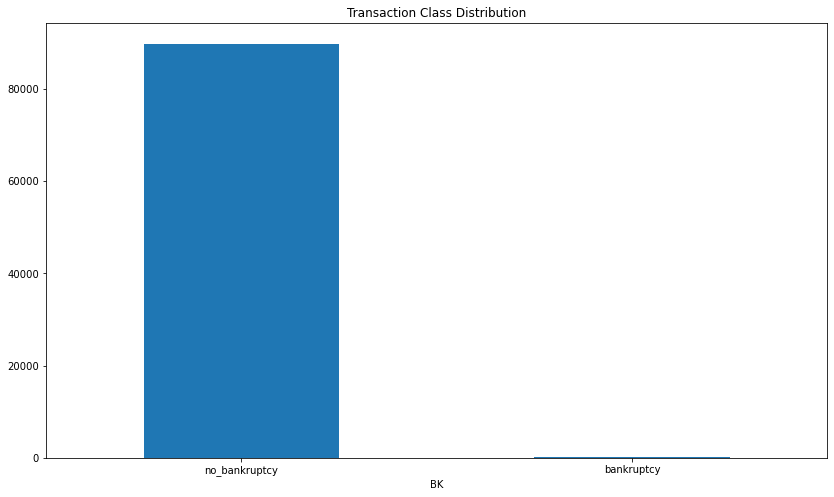

In [19]:
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["no_bankruptcy", "bankruptcy"]


count_classes = pd.value_counts(training['BK'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("BK")


In [20]:

from imblearn.under_sampling import NearMiss
# Implementing Undersampling for Handling Imbalanced 
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_res,y_res = undersample.fit_resample(X,Y)

In [21]:
X_res.shape,y_res.shape

((316, 15), (316,))

In [22]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 89842, 1: 158})
Resampled dataset shape Counter({0: 158, 1: 158})


In [23]:
train_x = np.asarray(X_res)
train_y = np.asarray(y_res)
test_x = np.asarray(XT)
test_y = np.asarray(YT)

In [69]:
model = Sequential()

In [36]:
# build network layers
model = Sequential()
model.add(Conv1D(128,3,input_shape=(15, 1)))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=10, batch_size=10)

# score model and log accuracy and parameters
scores = model.evaluate(test_x, test_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 13, 128)           512       
_________________________________________________________________
activation_5 (Activation)    (None, 13, 128)           0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 6, 128)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 128)            0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 769       
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
____________________________________________________

In [24]:
# CNN

#reshape input to be [samples, time steps, features] which is required for CNN
train_x =train_x.reshape(train_x.shape[0],train_x.shape[1] , 1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1] , 1)

In [25]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [26]:
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape = (256,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(64, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(128, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [80]:
# build LSTM layers
model = Sequential()
model.add(LSTM(100, dropout=0.2, input_shape=(15,1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


In [81]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(optimizer=Adam(lr=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

In [82]:
model.fit(train_x , train_y, epochs=10, validation_data=(test_x, test_y), verbose=1)

Train on 316 samples, validate on 2872 samples
Epoch 1/10
316/316 [==============================] - 7s 22ms/sample - loss: 0.6363 - accuracy: 0.7215 - val_loss: 0.6648 - val_accuracy: 0.7430
Epoch 2/10
316/316 [==============================] - 1s 3ms/sample - loss: 0.5034 - accuracy: 0.8038 - val_loss: 1.0279 - val_accuracy: 0.4620
Epoch 3/10
316/316 [==============================] - 1s 2ms/sample - loss: 0.3415 - accuracy: 0.8829 - val_loss: 1.4456 - val_accuracy: 0.4394
Epoch 4/10
316/316 [==============================] - 1s 3ms/sample - loss: 0.3097 - accuracy: 0.8766 - val_loss: 2.0734 - val_accuracy: 0.3548
Epoch 5/10
316/316 [==============================] - 1s 3ms/sample - loss: 0.2805 - accuracy: 0.8987 - val_loss: 2.1533 - val_accuracy: 0.3482
Epoch 6/10
316/316 [==============================] - 1s 3ms/sample - loss: 0.2697 - accuracy: 0.8987 - val_loss: 2.3006 - val_accuracy: 0.3409
Epoch 7/10
316/316 [==============================] - 1s 3ms/sample - loss: 0.2346 - acc

In [83]:
predictions = model.predict(test_x)

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,predictions)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [30]:
model = Sequential()
model.add(Conv1D(8, 2, activation='relu', input_shape = (15,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(10, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(12, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1, activation='sigmoid'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [30]:
model = Sequential()
model.add(Conv1D(128,3,input_shape=(15, 1)))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile(optimizer=Adam(lr=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(train_x , train_y, epochs=10, validation_data=(test_x, test_y), verbose=1)

Train on 316 samples, validate on 2872 samples
Epoch 1/10
316/316 [==============================] - 5s 15ms/sample - loss: 39.0208 - accuracy: 0.5000 - val_loss: 4.1518 - val_accuracy: 0.8611
Epoch 2/10
316/316 [==============================] - 0s 1ms/sample - loss: 26.4953 - accuracy: 0.5000 - val_loss: 3.3313 - val_accuracy: 0.8593
Epoch 3/10
316/316 [==============================] - 0s 733us/sample - loss: 17.9988 - accuracy: 0.4620 - val_loss: 2.7292 - val_accuracy: 0.8562
Epoch 4/10
316/316 [==============================] - 0s 681us/sample - loss: 36.8824 - accuracy: 0.4557 - val_loss: 2.2951 - val_accuracy: 0.8482
Epoch 5/10
316/316 [==============================] - 0s 669us/sample - loss: 25.9684 - accuracy: 0.4747 - val_loss: 2.0395 - val_accuracy: 0.8381
Epoch 6/10
316/316 [==============================] - 0s 600us/sample - loss: 23.1565 - accuracy: 0.4652 - val_loss: 1.9875 - val_accuracy: 0.8123
Epoch 7/10
316/316 [==============================] - 0s 684us/sample - lo

In [28]:
model.compile(optimizer=Adam(lr=0.00005), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=10, validation_data=(test_x, test_y), verbose=1)

Train on 316 samples, validate on 2872 samples
Epoch 1/10
316/316 [==============================] - 10s 30ms/sample - loss: 1.1674 - accuracy: 0.5127 - val_loss: 5.9490 - val_accuracy: 0.1393
Epoch 2/10
316/316 [==============================] - 1s 3ms/sample - loss: 1.2208 - accuracy: 0.4873 - val_loss: 3.9107 - val_accuracy: 0.1393
Epoch 3/10
316/316 [==============================] - 0s 953us/sample - loss: 1.1477 - accuracy: 0.4905 - val_loss: 3.0608 - val_accuracy: 0.1393
Epoch 4/10
316/316 [==============================] - 0s 841us/sample - loss: 1.1676 - accuracy: 0.4968 - val_loss: 2.5577 - val_accuracy: 0.1393
Epoch 5/10
316/316 [==============================] - 0s 831us/sample - loss: 1.0988 - accuracy: 0.5222 - val_loss: 2.2202 - val_accuracy: 0.1393
Epoch 6/10
316/316 [==============================] - 0s 857us/sample - loss: 1.1448 - accuracy: 0.5127 - val_loss: 1.9804 - val_accuracy: 0.1393
Epoch 7/10
316/316 [==============================] - 0s 791us/sample - loss: 1

In [34]:
model.compile(optimizer=Adam(lr=0.00005), loss='binary_crossentropy', metrics=['accuracy'])


In [35]:
history = model.fit(train_x , train_y, epochs=10, validation_data=(test_x, test_y), verbose=1)

ValueError: A target array with shape (316, 1) was passed for an output of shape (None, 15) while using as loss `binary_crossentropy`. This loss expects targets to have the same shape as the output.

In [42]:
history.history

{'loss': [0.754172362858736,
  0.8130169375033318,
  0.8347221182871468,
  0.7640596786631814,
  0.790756153909466,
  0.8701013432273382,
  0.8040449264683301,
  0.8068985342979431,
  0.7666553915301456,
  0.7634494636632219],
 'accuracy': [0.54746836,
  0.5,
  0.43670887,
  0.5316456,
  0.5221519,
  0.5063291,
  0.46518987,
  0.47468355,
  0.49683544,
  0.5],
 'val_loss': [1.1877896490203306,
  1.019304598938456,
  0.9489431811242383,
  0.9037680302157708,
  0.8735595189429259,
  0.8530979181398588,
  0.8400020028223234,
  0.829654664880386,
  0.8198662893353731,
  0.8144528879096581],
 'val_accuracy': [0.13927576,
  0.13927576,
  0.13927576,
  0.15389971,
  0.17270195,
  0.17374651,
  0.17374651,
  0.17688023,
  0.17688023,
  0.17653203]}

In [41]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, 10)

NameError: name 'history' is not defined

In [77]:
#reshape input to be [samples, time steps, features] which is required for LSTM
train_x =train_x.reshape(train_x.shape[0],train_x.shape[1] , 1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1] , 1)

In [76]:

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [48]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(15,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [49]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 15, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 15, 50)            20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=100,batch_size=64,verbose=1)

Train on 316 samples, validate on 2872 samples
Epoch 1/100
316/316 [==============================] - 17s 55ms/sample - loss: 0.3238 - val_loss: 0.3332
Epoch 2/100
316/316 [==============================] - 1s 3ms/sample - loss: 0.1735 - val_loss: 0.4707
Epoch 3/100
316/316 [==============================] - 1s 3ms/sample - loss: 0.1407 - val_loss: 0.3207
Epoch 4/100
316/316 [==============================] - 1s 3ms/sample - loss: 0.1348 - val_loss: 0.3979
Epoch 5/100
316/316 [==============================] - 1s 3ms/sample - loss: 0.1155 - val_loss: 0.4552
Epoch 6/100
316/316 [==============================] - 1s 3ms/sample - loss: 0.1031 - val_loss: 0.4404
Epoch 7/100
316/316 [==============================] - 1s 3ms/sample - loss: 0.0934 - val_loss: 0.5540
Epoch 8/100
316/316 [==============================] - 1s 3ms/sample - loss: 0.0838 - val_loss: 0.5938
Epoch 9/100
316/316 [==============================] - 1s 3ms/sample - loss: 0.0762 - val_loss: 0.6803
Epoch 10/100
316/316 [==

In [38]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(train_x)
test_predict=model.predict(test_x)

In [39]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_y,train_predict))

0.18833792974268387

In [40]:

### Test Data RMSE
math.sqrt(mean_squared_error(test_y,test_predict))

0.8368202959998177

In [41]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(13,10,2),max_iter=1000)
mlp.fit(train_x,train_y)


ValueError: Found array with dim 3. Estimator expected <= 2.

In [58]:
predictions =mlp.predict(test_x)

from sklearn.metrics import classification_report,confusion_matrix

cm=confusion_matrix(test_y,predictions)
print(confusion_matrix(test_y,predictions))


NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

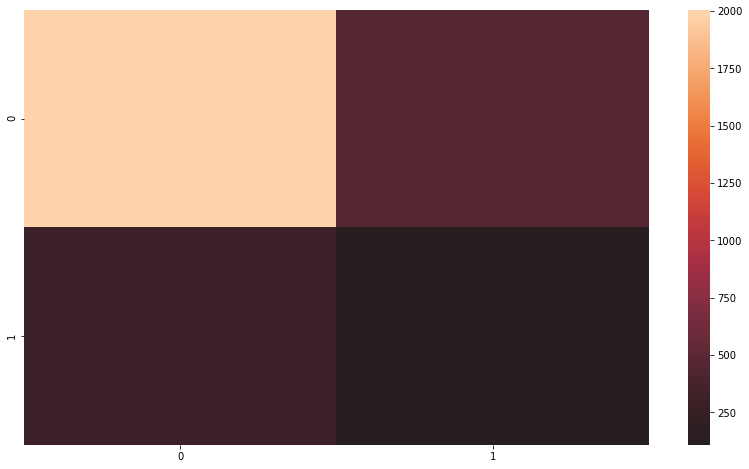

In [40]:
sns.heatmap(cm, center=True)
plt.show()

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,predictions)

0.7353760445682451

In [51]:
 clf = MLPClassifier(random_state=1, max_iter=300).fit(train_x,train_y)

In [52]:
clf.predict_proba(test_x[:1])

array([[0.52750165, 0.47249835]])

In [53]:
clf.predict(test_x[:5, :])

array([0, 0, 0, 1, 1], dtype=int64)

In [54]:
clf.score(test_x, test_y)

0.4491643454038997

In [55]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [56]:
clf.fit(train_x,train_y)
y_pred = clf.predict(test_x)

Iteration 1, loss = 17.90784930
Iteration 2, loss = 17.33756298
Iteration 3, loss = 17.79429245
Iteration 4, loss = 19.16533418
Iteration 5, loss = 17.57260763
Iteration 6, loss = 21.26488941
Iteration 7, loss = 24.15379785
Iteration 8, loss = 9583.84506547
Iteration 9, loss = 25027.31967172
Iteration 10, loss = 43048.16262786
Iteration 11, loss = 61262.24213211
Iteration 12, loss = 78388.89005613
Iteration 13, loss = 93818.55939868
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.


In [35]:
accuracy_score(test_y, y_pred)

0.1392757660167131

In [36]:
cm = confusion_matrix(test_y, y_pred)
cm

array([[   0, 2472],
       [   0,  400]], dtype=int64)

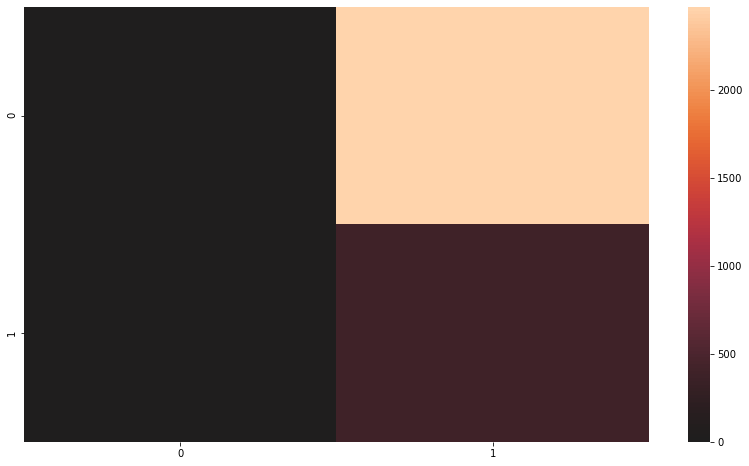

In [37]:
sns.heatmap(cm, center=True)
plt.show()